# Import Modules

In [1]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf


from MCForecastTools import MCSimulation
warnings.filterwarnings('ignore')


%matplotlib inline

#warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [2]:
## Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 4
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance? 4
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   4
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill  4
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 4


Your risk factor is 1.0


In [3]:
# print(client_risk)

In [4]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = int(investment_timeframe)

What is the desired timeframe(in # of years) for your investment? 10


# Data Input for Universe (Multiple Asset Classes)

In [5]:
# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=365*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2018-05-13'

'2023-05-12'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,0.004362,-0.001886,0.008820,-0.002277,0.000183,-0.004465,-0.001636,0.001524,0.006898,-0.009009,...,0.004415,-0.002559,0.000683,0.002100,0.000979,0.010794,0.000797,0.002121,0.004742,-0.003098
2018-06-21,-0.005577,0.000283,-0.011348,0.000507,0.000366,-0.003377,0.000041,-0.010412,-0.009168,-0.001414,...,-0.018516,-0.002932,-0.012555,-0.007684,0.001957,0.005967,0.003384,-0.005762,-0.007123,-0.009447
2018-06-22,-0.002912,0.000945,-0.008409,0.000634,0.000183,0.000265,0.001189,-0.001883,-0.008748,-0.003035,...,0.019951,-0.004779,0.003455,-0.003238,0.008202,0.008742,0.006944,0.004494,-0.001704,0.021207
2018-06-25,-0.014871,-0.000566,-0.030612,-0.000127,-0.001644,-0.011540,0.000921,-0.026543,-0.014783,0.000000,...,-0.020093,-0.010713,-0.012670,-0.020763,0.005036,-0.002476,0.016552,-0.009184,-0.021739,-0.020153
2018-06-26,0.012406,0.001605,0.016799,0.001647,0.000000,-0.001553,0.000306,-0.005645,0.001395,0.005479,...,0.012629,-0.003361,0.003766,0.004039,-0.004240,0.005275,0.001163,-0.003090,0.007163,0.011287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05,0.046927,-0.003201,0.015962,-0.003645,-0.003874,0.012125,-0.003247,0.009552,0.010905,-0.002298,...,0.027141,0.024723,0.015097,0.025078,0.009285,0.015460,0.006415,0.008988,0.020240,0.024896
2023-05-08,-0.000403,-0.005519,0.001609,-0.004743,-0.002252,0.006978,-0.004995,0.019065,0.004623,-0.011402,...,0.000000,0.001547,-0.003618,-0.000529,-0.002980,-0.006944,-0.003042,-0.002171,0.003397,0.003957
2023-05-09,-0.009971,-0.000908,0.007465,-0.001089,-0.000616,-0.003894,-0.000873,-0.002772,-0.000976,-0.000256,...,0.000374,-0.003706,0.002219,-0.007674,-0.003119,-0.003228,-0.001308,-0.006677,-0.000271,0.000275


In [6]:
display(og_data)

Adj Close                                               \
                  AAPL        AGG        AMZN        BND       BNDX   
Date                                                                  
2018-05-14   45.014751  93.800049   80.077003  69.335030  47.931122   
2018-05-15   44.605640  93.383179   78.806000  69.009605  47.834320   
2018-05-16   45.021927  93.276756   79.363998  68.956841  47.834320   
2018-05-17   44.737225  93.152618   79.087997  68.895264  47.790333   
2018-05-18   44.574535  93.392075   78.718498  69.079979  47.816734   
...                ...        ...         ...        ...        ...   
2023-05-05  173.570007  99.650002  105.660004  73.800003  48.849998   
2023-05-08  173.500000  99.099998  105.830002  73.449997  48.740002   
2023-05-09  171.770004  99.010002  106.620003  73.370003  48.709999   
2023-05-10  173.559998  99.650002  110.190002  73.820000  48.889999   
2023-05-11  173.750000  99.949997  112.180000  74.059998  49.090000   

                                                                     ...  \
                 BRK-B       FBND        GOOG       ICVT       LKOR  ...   
Date                                                                 ...   
2018-05-14  199.179993  41.936413   55.009998  47.381840  40.740231  ...   
2018-05-15  197.360001  41.738686   53.961498  47.349060  40.323177  ...   
2018-05-16  197.830002  41.781670   54.088501  47.603130  40.177704  ...   
2018-05-17  197.490005  41.730076   53.929501  47.496574  40.080708  ...   
2018-05-18  196.059998  41.764465   53.318001  47.429371  40.080708  ...   
...                ...        ...         ...        ...        ...  ...   
2023-05-05  323.880005  46.049999  106.214996  71.379997  43.415001  ...   
2023-05-08  326.140015  45.820000  108.239998  71.709999  42.919998  ...   
2023-05-09  324.869995  45.779999  107.940002  71.639999  42.909000  ...   
2023-05-10  322.989990  46.009998  112.279999  71.970001  43.299000  ...   
2023-05-11  322.640015  46.169998  116.900002  71.904999  43.610001  ...   

              Volume                                                   \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2018-05-14  10226300  31292900   5856600  10130900   6708100  1882900   
2018-05-15  10482700  54655800  10180500  14262600  22686900  2371100   
2018-05-16  11997200  31984900   6281300   6680500  12151300  1562100   
2018-05-17  16271300  45070400   7519500  10800100  19572900  1758200   
2018-05-18  14092700  33266100   7482900   7882900  15664700  1395300   
...              ...       ...       ...       ...       ...      ...   
2023-05-05  19533600  54989500   9231300   6114200  10479100  3265100   
2023-05-08  16355900  34323600   7610200   3397800   8069200  3358700   
2023-05-09  20710600  29736200   8068100   6236600   6939500  2995000   
2023-05-10  18026000  39706100  12580500   5275900  12259100  3770000   
2023-05-11  19084100  36693200  11573800   4478400  11790600  3419800   

                                                   
                 XLU       XLV      XLY       XOM  
Date                                               
2018-05-14   8512800  11837600  3324900  11852100  
2018-05-15  11070700   8806800  4558000  12595700  
2018-05-16  13541300   7013600  3239200   9570000  
2018-05-17  11276000   6610400  6364500  11224100  
2018-05-18  11810400   5838900  4108900  10030900  
...              ...       ...      ...       ...  
2023-05-05  11416600   7650300  3685900  14964700  
2023-05-08   8286700   5305700  3425000  11187800  
2023-05-09  10281100   6452700  4232500  11370800  
2023-05-10  10708300   6556600  4514000  14884800  
2023-05-11  14874100   8764800  4144300  17165900  

[1258 rows x 180 columns]

# Client Scaling Factor

This code was added to ensure that the calculation from the client had a risk aversion factor between 0 and 1, where 0 is highly risk adverse & 1 is low risk aversion. 

In [7]:
# Client fear factor scaling. necessary as porfolio optimization solution uses an logarithmic estimation
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(f'Client risk aversion is: {fear_factor}')

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(f'Client risk aversion is: {fear_factor}')
elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(f'Client risk aversion is: {fear_factor}')
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(f'Client risk aversion is: {fear_factor}')
    else:
        print(f"Number isn't between 0 and 1")
       

Client risk aversion is: 0


# Portfolio Optimization using Risk Parity Model

In [8]:
import riskfolio as rp
#pd.options.display.float_format = '{:.4%}'.format

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,8.369191e-09,1.067550e-08,1.480115e-08,1.067844e-08,1.040756e-08,1.552835e-08,1.090818e-08,1.880710e-08,1.378739e-08,1.109381e-08,...,1.526078e-08,1.342836e-08,1.421725e-08,1.939935e-08,1.505348e-08,1.371639e-08,1.487034e-08,1.514900e-08,1.400473e-08,1.724012e-08


# Optimal Portfolio

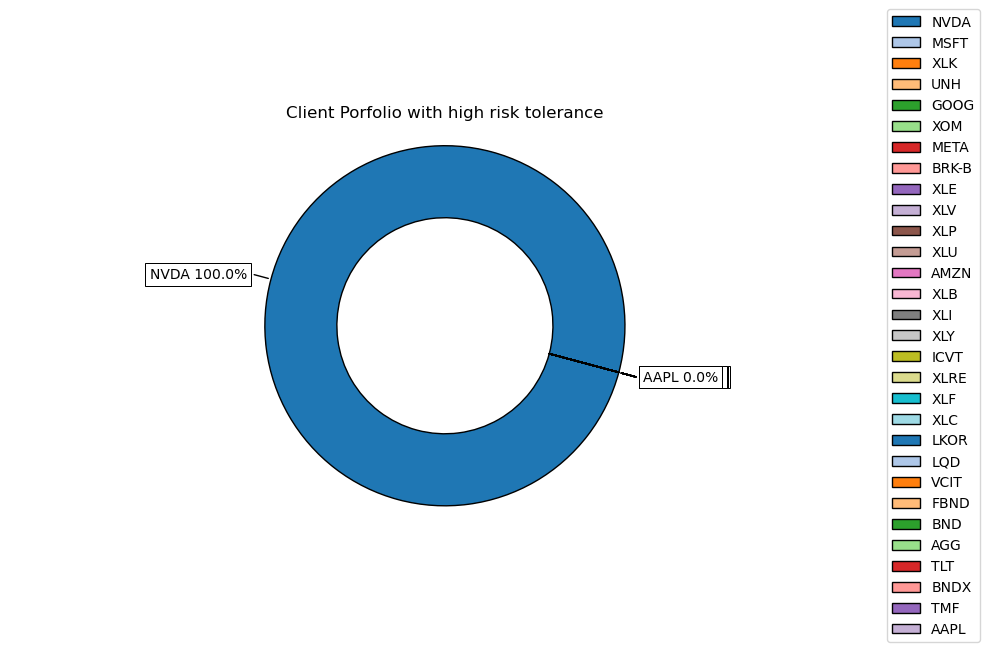

In [9]:
# plot the weights of the optimal portfolio
ax = rp.plot_pie(w=w, title='Client Porfolio with high risk tolerance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

# Code to print out image of results to share with client and include in readme commented out only necessary for reporting
#ax.get_figure().savefig('./images/risky_portfolio.png',bbox_inches = 'tight')

In [10]:
# Calculating the efficient frontier for the portfolio
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
0,1.775697e-09,2.691578e-07,1.500712e-09,3.911200e-08,0.973690,2.282319e-08,7.308277e-09,2.058280e-09,4.548241e-09,7.432608e-10,...,3.191790e-09,7.739308e-03,2.631443e-09,1.505753e-09,7.262664e-08,9.635875e-10,1.206919e-09,1.574830e-08,1.563568e-09,0.018570
1,5.440998e-02,1.548613e-01,2.209715e-10,1.307130e-08,0.702746,1.355151e-09,3.188324e-09,5.241305e-10,5.984249e-10,3.208519e-10,...,3.835743e-10,3.387624e-10,3.598155e-10,3.773051e-10,3.996485e-02,2.630906e-10,6.043098e-10,1.656320e-09,2.376142e-10,0.028324
2,7.812805e-02,2.259927e-01,1.193065e-10,7.182002e-09,0.577756,6.619971e-10,2.339545e-09,2.753029e-10,3.174663e-10,2.400724e-10,...,2.297144e-10,1.790561e-10,2.105560e-10,2.129089e-10,4.711524e-02,1.720368e-10,5.277362e-10,7.443370e-10,1.346965e-10,0.030433
3,9.850550e-02,2.871522e-01,9.016360e-12,6.327782e-10,0.470301,5.079582e-11,2.067596e-10,2.113785e-11,2.414590e-11,2.122010e-11,...,1.784319e-11,1.350526e-11,1.636010e-11,1.612197e-11,5.327561e-02,1.408633e-11,5.119848e-11,5.539624e-11,1.033290e-11,0.032246
4,1.169808e-01,3.168560e-01,3.295318e-10,2.440182e-08,0.382696,1.818263e-09,8.796894e-09,7.583528e-10,8.713488e-10,8.563547e-10,...,6.623887e-10,4.888583e-10,6.041453e-10,5.914336e-10,6.058658e-02,5.379722e-10,2.187452e-09,1.952431e-09,3.813531e-10,0.035189


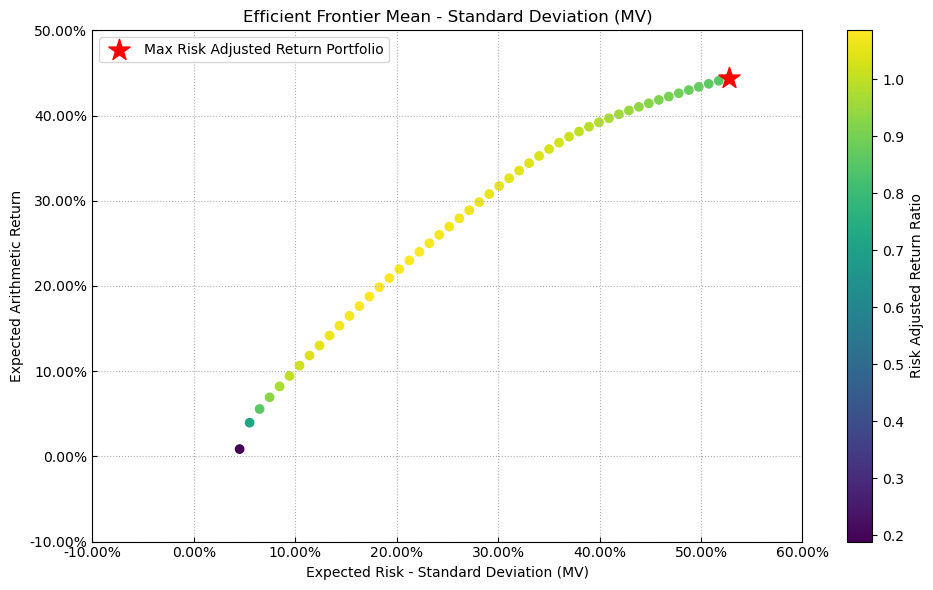

In [11]:
# plot the efficient frontier for the optimal porfolio

label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                        ax=None)
# Comment used to plot the efficent frontier for the optimal porfolio
#ax.get_figure().savefig('./images/risky_portfolio_efficient_frontier.png',bbox_inches = 'tight')

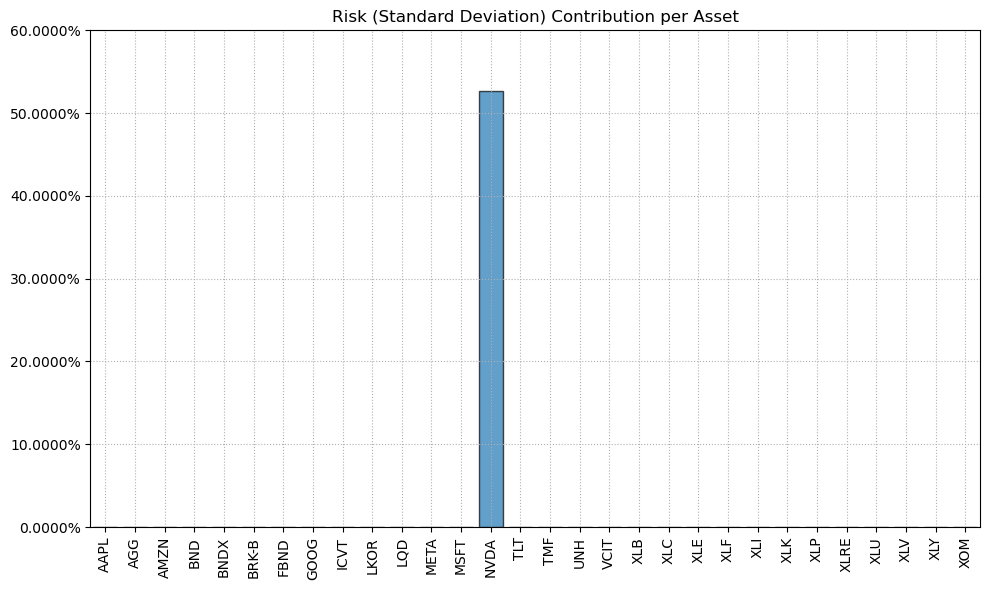

In [12]:
# plot for the standard deviation of the optimal portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# code to save image of the standard deviation
#ax.get_figure().savefig('./images/Risky Portfolio Standard Deviation.png',bbox_inches = 'tight')

In [13]:
# used to save weights to a csv file
#w.to_csv(Path("w.csv"))

# Portfolio Optimization (Assuming uniformly distributed risk across all assets)

Special case of risk parity (vanilla risk parity where risk is equally weighted across all assets) 

In [14]:
# Risk parity porfolio assuming that risk is eqaully distributed, where 'b' which is a constraint variable is set to none
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,8.369191e-09,1.067550e-08,1.480115e-08,1.067844e-08,1.040756e-08,1.552835e-08,1.090818e-08,1.880710e-08,1.378739e-08,1.109381e-08,...,1.526078e-08,1.342836e-08,1.421725e-08,1.939935e-08,1.505348e-08,1.371639e-08,1.487034e-08,1.514900e-08,1.400473e-08,1.724012e-08


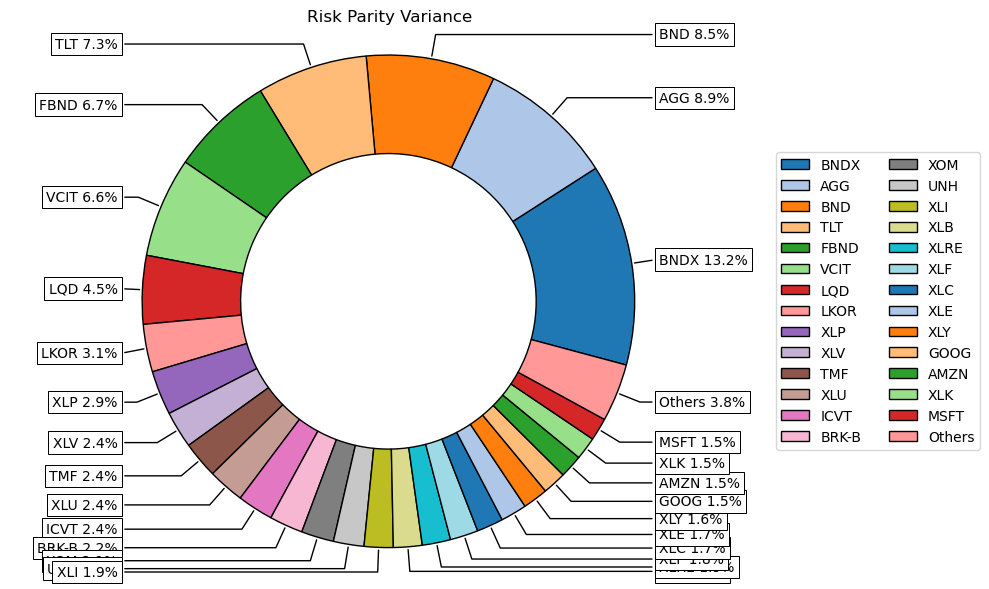

In [15]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

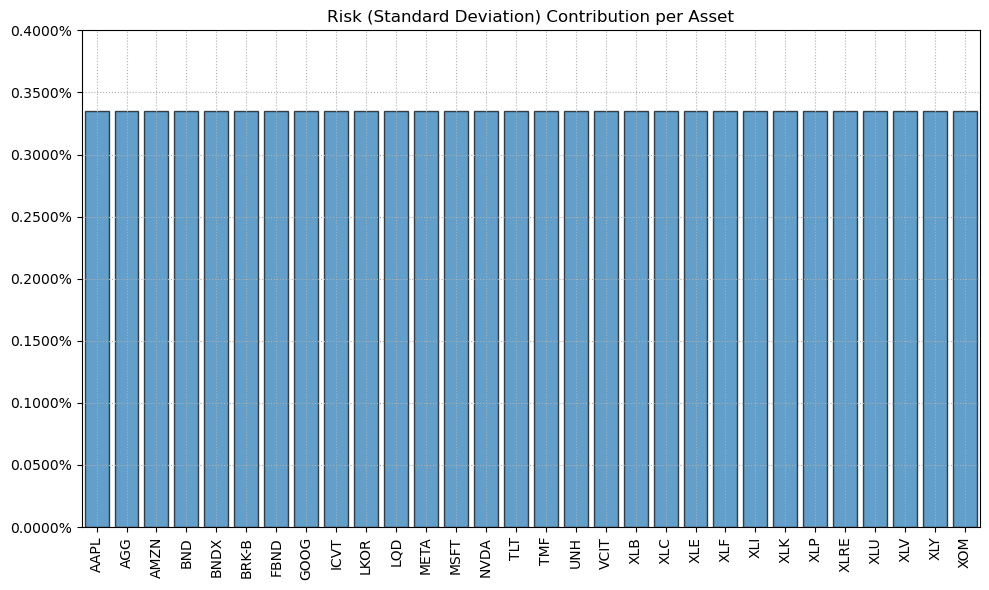

In [16]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# Monte Carlo Simulation

In [17]:
#using the weight 'w' from the optimal portfolio as the weights to simulate the projected returns from the portfolio


#portfolio_path = Path("w.csv")
#portfolio_df = pd.read_csv(portfolio_path)
#display(w)

# Monte Carlo simulation is on the optimal portfolio
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

portfolio_df = w
portfolio_df = portfolio_df.reset_index()
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight'].apply(lambda x: "{:.10f}".format(x))
portfolio_df['Weight'] = portfolio_df['Weight'].astype(float)
portfolio_df.head()

,Ticker,Weight
0,AAPL,8.400000e-09
1,AGG,1.070000e-08
2,AMZN,1.480000e-08
3,BND,1.070000e-08
4,BNDX,1.040000e-08


In [18]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list

# test to ensure weights are float
#for i in weights_list:
   # print(type(i))
    

[8.4e-09,
 1.07e-08,
 1.48e-08,
 1.07e-08,
 1.04e-08,
 1.55e-08,
 1.09e-08,
 1.88e-08,
 1.38e-08,
 1.11e-08,
 1.11e-08,
 1.59e-08,
 2.05e-08,
 0.999999598,
 1.05e-08,
 9.6e-09,
 1.88e-08,
 1.11e-08,
 1.43e-08,
 1.29e-08,
 1.53e-08,
 1.34e-08,
 1.42e-08,
 1.94e-08,
 1.51e-08,
 1.37e-08,
 1.49e-08,
 1.51e-08,
 1.4e-08,
 1.72e-08]

In [19]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, start, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1).dropna()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AAPL                                  AGG             \
                  open       close daily_return        open      close   
Date                                                                     
2018-06-20   46.587502   44.619995     0.004362  106.059998  94.064400   
2018-06-21   46.812500   44.371174    -0.005576  105.879997  94.091080   
2018-06-22   46.529999   44.241974    -0.002912  105.820000  94.179977   
2018-06-25   45.849998   43.584045    -0.014871  105.949997  94.126625   
2018-06-26   45.747501   44.124744     0.012406  105.989998  94.277748   
...                ...         ...          ...         ...        ...   
2023-05-08  172.479996  173.500000    -0.000403   99.209999  99.099998   
2023-05-09  173.050003  171.770004    -0.009971   99.110001  99.010002   
2023-05-10  173.020004  173.559998     0.010421   99.430000  99.650002   
2023-05-11  173.850006  173.750000     0.001095  100.110001  99.949997   
2023-05-12  173.619995  172.570007    -0.006791   99.889999  99.389999   

                               AMZN                                 BND  ...  \
           daily_return        open       close daily_return       open  ...   
Date                                                                     ...   
2018-06-20    -0.001886   87.125000   87.503998     0.008820  79.050003  ...   
2018-06-21     0.000284   88.000000   86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945   87.130997   85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566   85.125504   83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001606   83.618500   84.554497     0.016799  79.000000  ...   
...                 ...         ...         ...          ...        ...  ...   
2023-05-08    -0.005519  105.040001  105.830002     0.001609  73.500000  ...   
2023-05-09    -0.000908  105.480003  106.620003     0.007465  73.430000  ...   
2023-05-10     0.006464  108.099998  110.190002     0.033483  73.680000  ...   
2023-05-11     0.003010  111.029999  112.180000     0.018060  74.180000  ...   
2023-05-12    -0.005603  112.160004  110.260002    -0.017115  74.010002  ...   

                    XLU         XLV                                  XLY  \
           daily_return        open       close daily_return        open   
Date                                                                       
2018-06-20     0.000797   84.970001   78.318901     0.002121  112.360001   
2018-06-21     0.003384   84.959999   77.867622    -0.005762  112.470001   
2018-06-22     0.006944   84.860001   78.217583     0.004494  112.000000   
2018-06-25     0.016552   84.610001   77.499229    -0.009184  110.860001   
2018-06-26     0.001163   84.220001   77.259773    -0.003090  109.309998   
...                 ...         ...         ...          ...         ...   
2023-05-08    -0.003042  133.389999  133.300003    -0.002171  147.639999   
2023-05-09    -0.001308  132.789993  132.410004    -0.006677  146.880005   
2023-05-10     0.009166  132.789993  132.779999     0.002794  149.009995   
2023-05-11    -0.010236  132.500000  132.369995    -0.003088  148.490005   
2023-05-12     0.005535  132.570007  132.190002    -0.001360  149.600006   

                                            XOM                           
                 close daily_return        open       close daily_return  
Date                                                                      
2018-06-20  106.909904     0.004741   80.849998   62.641460    -0.003098  
2018-06-21  106.148376    -0.007123   80.019997   62.049713    -0.009447  
2018-06-22  105.967522    -0.001704   81.160004   63.365593     0.021207  
2018-06-25  103.663872    -0.021739   80.779999   62.088619    -0.020152  
2018-06-26  104.406372     0.007163   80.150002   62.789406     0.011287  
...                ...          ...         ...         ...          ...  
2023-05-08  147.690002     0.003397  110.500000  109.110001     0.003957  
2023-05-09  147.649994    -0.000271  108.3399

In [20]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=40,
    num_trading_days=252*investment_timeframe
)


thirty_year_simulation.portfolio_data.head()


AAPL                                 AGG             \
                 open      close daily_return        open      close   
Date                                                                   
2018-06-20  46.587502  44.619995     0.004362  106.059998  94.064400   
2018-06-21  46.812500  44.371174    -0.005576  105.879997  94.091080   
2018-06-22  46.529999  44.241974    -0.002912  105.820000  94.179977   
2018-06-25  45.849998  43.584045    -0.014871  105.949997  94.126625   
2018-06-26  45.747501  44.124744     0.012406  105.989998  94.277748   

                              AMZN                                BND  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2018-06-20    -0.001886  87.125000  87.503998     0.008820  79.050003  ...   
2018-06-21     0.000284  88.000000  86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945  87.130997  85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566  85.125504  83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001606  83.618500  84.554497     0.016799  79.000000  ...   

                    XLU        XLV                                 XLY  \
           daily_return       open      close daily_return        open   
Date                                                                     
2018-06-20     0.000797  84.970001  78.318901     0.002121  112.360001   
2018-06-21     0.003384  84.959999  77.867622    -0.005762  112.470001   
2018-06-22     0.006944  84.860001  78.217583     0.004494  112.000000   
2018-06-25     0.016552  84.610001  77.499229    -0.009184  110.860001   
2018-06-26     0.001163  84.220001  77.259773    -0.003090  109.309998   

                                           XOM                          
                 close daily_return       open      close daily_return  
Date                                                                    
2018-06-20  106.909904     0.004741  80.849998  62.641460    -0.003098  
2018-06-21  106.148376    -0.007123  80.019997  62.049713    -0.009447  
2018-06-22  105.967522    -0.001704  81.160004  63.365593     0.021207  
2018-06-25  103.663872    -0.021739  80.779999  62.088619    -0.020152  
2018-06-26  104.406372     0.007163  80.150002  62.789406     0.011287  

[5 rows x 90 columns]

In [21]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001246,1.037677,0.963229,1.038099,1.033182,1.013106,1.032649,1.033494,1.030899,1.031127,...,1.040513,1.035863,0.997930,1.004046,0.962024,1.002971,0.982813,1.037295,1.010329,1.017658
2,0.996471,1.058085,0.934440,1.093002,1.007241,1.031871,1.066062,1.054889,1.044766,0.994026,...,1.010577,1.036115,0.963387,0.979532,0.969254,1.031804,0.981392,1.041326,1.012726,1.010446
3,1.039697,1.052824,0.930921,1.076247,1.018731,1.038626,1.109431,1.056416,1.017228,0.955025,...,0.949347,1.076811,1.031350,1.016140,1.031291,1.030332,0.955545,1.005709,1.054051,0.967672
4,1.061964,1.034353,0.927424,0.990896,0.970004,0.985982,1.093533,1.007575,1.029036,0.973372,...,0.985683,1.061317,1.072164,1.050619,1.043040,1.028115,0.934896,1.028920,1.089253,0.958552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,25.307170,249.206314,0.075125,400.974392,139.956505,4.584636,4.182132,25.188270,15.869170,6.642564,...,3.561336,688.353863,10.182857,85.891157,29.618724,604.207543,33.273925,30.807190,21.514695,128.120418
2517,25.602644,247.317619,0.080991,412.649647,148.269703,4.523110,4.176431,24.880247,15.413098,6.565608,...,3.385071,700.552051,10.688409,87.508782,29.527673,634.536645,33.992320,30.929468,21.464717,126.357740
2518,26.025000,251.137926,0.080391,413.436275,146.505376,4.728176,4.151934,24.459149,15.951953,6.393859,...,3.439644,689.683252,10.710383,88.438207,30.081680,661.240611,35.328519,31.173069,21.339103,127.085180
2519,24.891400,250.029630,0.084976,360.592488,151.860812,4.543584,4.388588,25.519374,15.902482,6.493096,...,3.373636,699.970740,10.383795,85.146333,29.833248,611.833775,35.922875,31.366718,20.059628,137.153083


<AxesSubplot:title={'center':'40 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

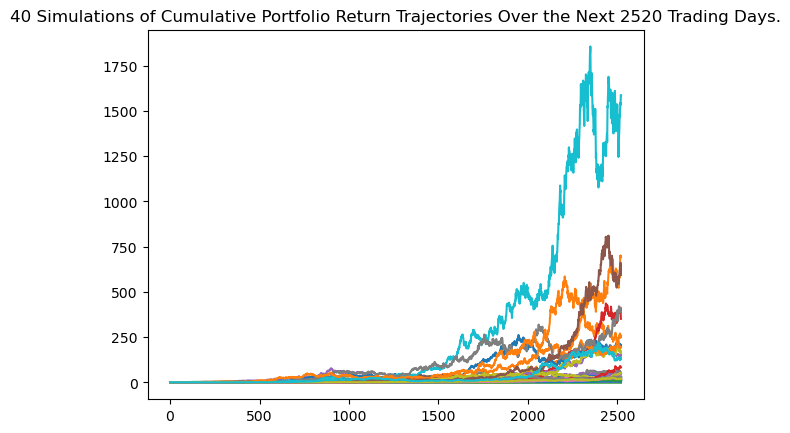

In [22]:
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 40 Simulations'}, ylabel='Frequency'>

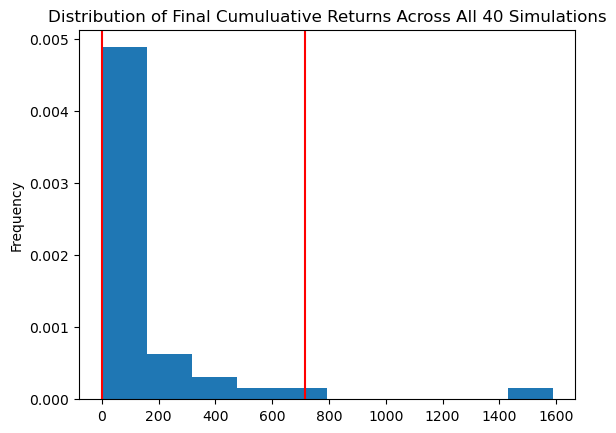

In [23]:
thirty_year_simulation.plot_distribution()

In [24]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count             40.000000
mean             133.412392
std              284.437251
min                0.056510
25%               10.004593
50%               27.643107
75%              137.045822
max             1586.905053
95% CI Lower       0.081789
95% CI Upper     715.962833
Name: 2520, dtype: float64